In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [114]:
df_full = pd.read_csv('movies.csv')
df_full.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [115]:
df_full.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
df = df_full[['release_year','genres', 'budget','revenue','runtime','original_title']]
df

,release_year,genres,budget,revenue,runtime,original_title
0,2015,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,Jurassic World
1,2015,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,Mad Max: Fury Road
2,2015,Adventure|Science Fiction|Thriller,110000000,295238201,119,Insurgent
3,2015,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,Star Wars: The Force Awakens
4,2015,Action|Crime|Thriller,190000000,1506249360,137,Furious 7
...,...,...,...,...,...,...
10861,1966,Documentary,0,0,95,The Endless Summer
10862,1966,Action|Adventure|Drama,0,0,176,Grand Prix
10863,1966,Mystery|Comedy,0,0,94,Beregis Avtomobilya
10864,1966,Action|Comedy,0,0,80,"What's Up, Tiger Lily?"


# Exploratory
## Univariate

In [117]:
#Getting movies only from 2015.
df_15 = df.query('release_year == 2015')
df_15

,release_year,genres,budget,revenue,runtime,original_title
0,2015,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,Jurassic World
1,2015,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,Mad Max: Fury Road
2,2015,Adventure|Science Fiction|Thriller,110000000,295238201,119,Insurgent
3,2015,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,Star Wars: The Force Awakens
4,2015,Action|Crime|Thriller,190000000,1506249360,137,Furious 7
...,...,...,...,...,...,...
624,2015,Comedy|Drama|Family,0,732655,119,Once I Was a Beehive
625,2015,Comedy,0,0,62,John Mulaney: The Comeback Kid
626,2015,Documentary,0,0,88,Meet the Patels
627,2015,Documentary,0,0,90,I Hate Christian Laettner


In [118]:
#Dropping rows with no data for budget/revenue.
df_15 = df_15.query('budget != 0' and 'revenue != 0')
df_15

,release_year,genres,budget,revenue,runtime,original_title
0,2015,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,Jurassic World
1,2015,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,Mad Max: Fury Road
2,2015,Adventure|Science Fiction|Thriller,110000000,295238201,119,Insurgent
3,2015,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,Star Wars: The Force Awakens
4,2015,Action|Crime|Thriller,190000000,1506249360,137,Furious 7
...,...,...,...,...,...,...
574,2015,Documentary,0,1301696,89,The Wolfpack
578,2015,Documentary,0,44695,73,Requiem for the American Dream
583,2015,Drama,13500000,187674,129,Stonewall
617,2015,Horror|Comedy|Drama,0,13684,97,Buzzard


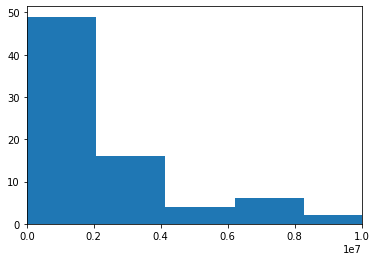

In [119]:
plt.hist(df_15.revenue, bins=1000);
plt.xlim(0,10000000);

> Here we see an overwhelming majority of movies in 2015 have revenue well over 40

## Bivariate

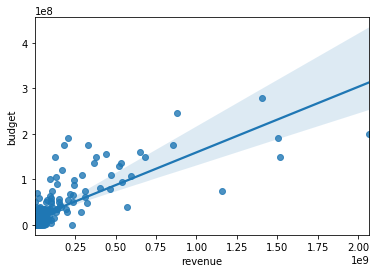

In [120]:
#Looking at a RevenuexBudget relationship
sb.regplot(data=df_15, x='revenue',y='budget');

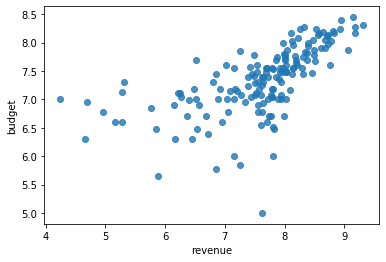

In [121]:
#Comparing with transformed data
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df_15['revenue'].apply(log_trans), df_15['budget'].apply(log_trans));

## Multivariate

In [122]:
# g = sb.FacetGrid(data = df_15, hue = 'runtime', size = 5);
# g.map(plt.scatter, 'revenue', 'budget');
# g.add_legend();

In [123]:
#lets split up runtime column into two! one with <= median and another column that's >median
df_15.runtime.median()

106.0

In [124]:
df_15['runtime<106'] = df_15.query('runtime <= 106')
df_15['runtime>106'] = df_15.query('runtime > 106')

ValueError: Wrong number of items passed 6, placement implies 1